In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [2]:
data  = pd.read_csv("G://train//train.csv")

In [3]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [4]:
data.shape

(7095, 3)

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

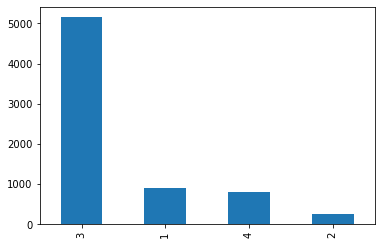

In [5]:
data["ClassId"].value_counts().plot(kind = "bar")
data["ClassId"].value_counts()


In [6]:
l1=[]
l2=[]
for ImageId,ClassId,EncodedPixels in tqdm(data.values):
    img = cv2.imread("G://train_images//{}".format(ImageId),cv2.IMREAD_COLOR)
    img = cv2.resize(img,(120,120))
    l1.append(img)
    l2.append(ClassId)

100%|██████████| 7095/7095 [02:09<00:00, 54.66it/s]


In [7]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255 #converting range from 0 to 1

y = encoder.fit_transform(l2) # using label encoding
y = to_categorical(y)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5676, 120, 120, 3)
x_test shape: (1419, 120, 120, 3)
y_train shape: (5676, 4)
y_test shape: (1419, 4)


In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [11]:



model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [12]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=100,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
57/57 [==============================] - 76s 1s/step - loss: 0.9066 - accuracy: 0.7148 - val_loss: 0.8250 - val_accuracy: 0.7259
Epoch 2/15
57/57 [==============================] - 58s 1s/step - loss: 0.8030 - accuracy: 0.7259 - val_loss: 0.7863 - val_accuracy: 0.7259
Epoch 3/15
57/57 [==============================] - 58s 1s/step - loss: 0.7594 - accuracy: 0.7377 - val_loss: 0.7162 - val_accuracy: 0.7428
Epoch 4/15
57/57 [==============================] - 62s 1s/step - loss: 0.7033 - accuracy: 0.7474 - val_loss: 0.6698 - val_accuracy: 0.7519
Epoch 5/15
57/57 [==============================] - 70s 1s/step - loss: 0.6707 - accuracy: 0.7479 - val_loss: 0.6523 - val_accuracy: 0.7484
Epoch 6/15
57/57 [==============================] - 56s 988ms/step - loss: 0.6423 - accuracy: 0.7489 - val_loss: 0.6130 - val_accuracy: 0.7576
Epoch 7/15
57/57 [==============================] - 69s 1s/step - loss: 0.6257 - accuracy: 0.7556 - val_loss: 0.6234 - val_accuracy: 0.7541
Epoch 8/15
57/57 

<AxesSubplot:title={'center':'Loss curve'}>

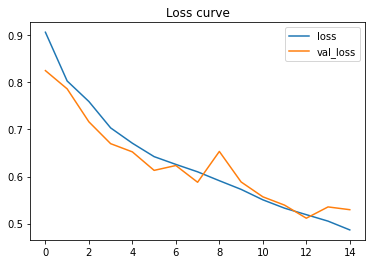

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<AxesSubplot:title={'center':'Accuracy curve'}>

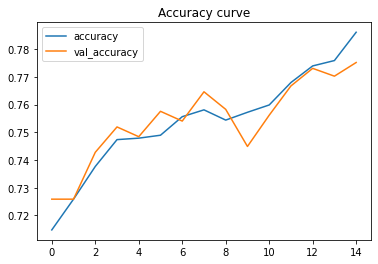

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [15]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 5s 104ms/step - loss: 0.5295 - accuracy: 0.7752
[+] Accuracy: 77.52%
